1. Install the Vertex AI SDK: Open a terminal window and enter the command below. You can also [install it in a virtualenv](https://googleapis.dev/python/aiplatform/latest/index.html)

In [1]:
!pip install --upgrade --user google-cloud-aiplatform

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 52.3 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


2. To use the newly installed packages in this Jupyter runtime, you must restart the runtime. You can do this by running the cell below, which restarts the current kernel. The restart might take a minute or longer. After it is restarted, continue to the next step.

In [2]:
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

3. Set up the helper function to display image.

In [1]:
import typing
import IPython.display
from PIL import Image as PIL_Image
from PIL import ImageOps as PIL_ImageOps

def display_image(
    image,
    max_width: int = 600,
    max_height: int = 350,
) -> None:
    pil_image = typing.cast(PIL_Image.Image, image._pil_image)
    if pil_image.mode != "RGB":
        # RGB is supported by all Jupyter environments (e.g. RGBA is not yet)
        pil_image = pil_image.convert("RGB")
    image_width, image_height = pil_image.size
    if max_width < image_width or max_height < image_height:
        # Resize to display a smaller notebook image
        pil_image = PIL_ImageOps.contain(pil_image, (max_width, max_height))
    IPython.display.display(pil_image)

4. Use the following code in your application to request a model response.

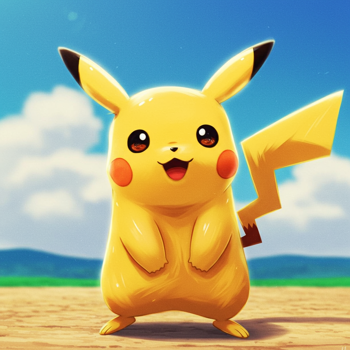

In [2]:
from vertexai.preview.vision_models import ImageGenerationModel
import vertexai

vertexai.init(project="gde-kj", location="us-central1")

generation_model = ImageGenerationModel.from_pretrained("imagen-3.0-generate-002")

images = generation_model.generate_images(
    prompt="Edit an image of Picachu",
    number_of_images=1,
    aspect_ratio="1:1",
    negative_prompt="",
    person_generation="",
    safety_filter_level="",
    add_watermark=True,
)

display_image(images[0])

5. Use the following code in your application to request a model response. Be sure to replace out "ENTER PROMPT HERE" with your prompt.

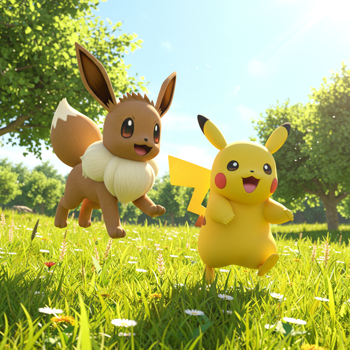

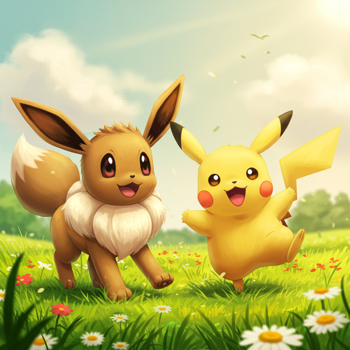

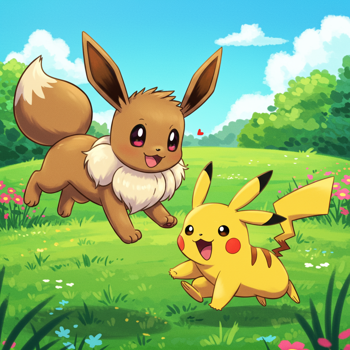

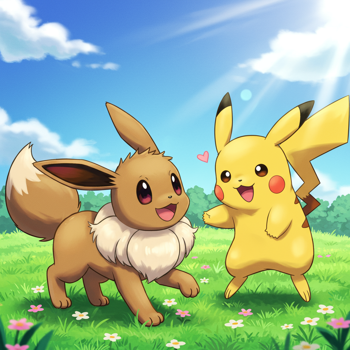

In [5]:
from vertexai.preview.vision_models import ImageGenerationModel
import vertexai

vertexai.init(project="gde-kj", location="us-central1")

generation_model = ImageGenerationModel.from_pretrained("imagen-3.0-generate-002")

images = generation_model.generate_images(
    prompt="Edit an image of Eevee is playing with Pikachu",
    number_of_images=4,
    aspect_ratio="1:1",
    negative_prompt="",
    person_generation="",
    safety_filter_level="",
    add_watermark=True,
)

# Display each image
for image in images:
    display_image(image)